In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("setup completed")

setup completed


In [304]:
df1=pd.read_csv(r"C:\Users\Suleman\Downloads\bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [305]:
list(df1.columns)

['area_type',
 'availability',
 'location',
 'size',
 'society',
 'total_sqft',
 'bath',
 'balcony',
 'price']

In [306]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [307]:
df1.shape

(13320, 9)

# data cleaning

In [308]:
# anlayzing columns wise
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [309]:
df2=df1.drop(['area_type','availability','society','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [310]:
# data cleaning

In [311]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [312]:
df3=df2.dropna()
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [313]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [314]:
df3['size'].describe()

count     13246
unique       31
top       2 BHK
freq       5198
Name: size, dtype: object

In [315]:
df3['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [316]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\Suleman\AppData\Local\Temp\ipykernel_18472\4200255786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [317]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [318]:
del(df3['size'])

In [319]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [320]:
sorted(df3['bhk'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 27, 43]

In [321]:
# next column TOTAL SQUAREFEET

In [322]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [323]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [324]:
# some values are not in format eg:'1133 - 1384' etc
'''lets contvert the object type of 'total_sqft' into float,
so the concept is , any number having non numeric 
or special characters won't be conveted in float'''

"lets contvert the object type of 'total_sqft' into float,\nso the concept is , any number having non numeric \nor special characters won't be conveted in float"

In [325]:
# create a function for above case
def is_float(val):
    try:
        float(val)
    except:
        return False
    # we will return TRUE if the try executes
    return True
        

In [326]:
sqft_str=df3[~df3['total_sqft'].apply(is_float)]
sqft_str

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [327]:
list(sqft_str['total_sqft'].unique())

['2100 - 2850',
 '3067 - 8156',
 '1042 - 1105',
 '1145 - 1340',
 '1015 - 1540',
 '34.46Sq. Meter',
 '1195 - 1440',
 '4125Perch',
 '1120 - 1145',
 '3090 - 5002',
 '1160 - 1195',
 '1000Sq. Meter',
 '1115 - 1130',
 '1100Sq. Yards',
 '520 - 645',
 '1000 - 1285',
 '650 - 665',
 '633 - 666',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '716Sq. Meter',
 '547.34 - 827.31',
 '580 - 650',
 '3425 - 3435',
 '1804 - 2273',
 '3630 - 3800',
 '4000 - 5249',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '1004 - 1204',
 '361.33Sq. Yards',
 '645 - 936',
 '2710 - 3360',
 '2830 - 2882',
 '596 - 804',
 '1255 - 1863',
 '1300 - 1405',
 '117Sq. Yards',
 '934 - 1437',
 '980 - 1030',
 '2249.81 - 4112.19',
 '1070 - 1315',
 '3040Sq. Meter',
 '500Sq. Yards',
 '2806 - 3019',
 '613 - 648',
 '704 - 730',
 '1210 - 1477',
 '3369 - 3464',
 '1125 - 1500',
 '167Sq. Meter',
 '1076 - 1199',
 '381 - 535',
 '524 - 894',
 '540 - 670',
 '3

In [328]:
''' convert ' - ' separateds range sqftarea values in a average '''
def convert_rangesqft_to_avg(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1])) / 2
    try :
        return float(x)
    except:
        return None


In [329]:
convert_rangesqft_to_avg('1133 - 1384')

1258.5

In [330]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_rangesqft_to_avg)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [331]:
df4['total_sqft'].unique()


array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [332]:
df4.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


# feature engineering`

In [333]:
df5=df4.copy()
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [334]:
# now let's create a new column for per_sqft_price

In [335]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [336]:
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [337]:
len(df5.location.unique())

1304

In [338]:
# trimming trailing spaces for better accuracy
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [339]:
len(location_stats[location_stats<=10])

1052

In [340]:
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [341]:
# lets consider this 1052 multiple location with <10  occurance as 'others'

In [342]:
#cheak out 
len(df5.location.unique())

1293

In [343]:
df5.location=df5.location.apply(lambda x : 'other' if x  in location_stats_lessthan_10 else x)
np.sort(df5.location.unique())
len(df5.location.unique())

242

In [344]:
df5.sample(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
11776,Kambipura,883.0,2.0,49.0,2,5549.263873
1888,other,1188.0,2.0,73.0,2,6144.781145
2091,Whitefield,1485.0,2.0,90.0,2,6060.606061
4635,Whitefield,2928.0,4.0,198.0,4,6762.295082
11501,Kanakpura Road,1100.0,3.0,53.0,3,4818.181818
2176,KR Puram,750.0,2.0,25.0,2,3333.333333
2994,Ramamurthy Nagar,1330.0,4.0,140.0,3,10526.315789
1407,Nagasandra,4050.0,5.0,140.0,5,3456.790123
10882,Marathahalli,1170.0,2.0,85.0,2,7264.957265
3062,Rajaji Nagar,1800.0,3.0,260.0,3,14444.444444


# OUTLIER DETECTION AND REMOVAL

In [345]:
# outlier exist only in numerical columns
df5.describe()
# these are the columns 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft' having outliers

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [346]:
min_sqft=df5['total_sqft']/df5['bhk']
counts=(min_sqft.value_counts())
counts

600.000000     531
500.000000     336
550.000000     260
400.000000     255
450.000000     194
              ... 
1193.333333      1
615.250000       1
137.500000       1
718.500000       1
1172.250000      1
Name: count, Length: 2107, dtype: int64

In [347]:
min_sqft.describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

In [348]:
# properties with 1bhk in  less than 300 sqft are abnormal
min_sqft.loc[(min_sqft<300)]


9        170.000000
45        75.000000
58       234.500000
68       168.750000
70       166.666667
            ...    
13277    200.000000
13279    200.000000
13281    275.000000
13303    154.800000
13311    214.285714
Length: 744, dtype: float64

In [349]:

df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()
#df6 dataframe has all properties with not less 300 sqft (  ~  )

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [350]:
df5.shape[0]

13246

In [351]:
df6.shape[0]
# seem we have remove outliers to some extent ie 744 entries

12502

In [352]:
# for per_sqft columns

In [353]:
df6.price_per_sqft.describe()
# min and max per_sqft price is 267 rupees and 176k rupees per sqft , thats possibly abnormal

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [354]:
# for above stats lets filterout based on locations std deviation

In [355]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        # key=location ,subdf= corresponding columns next to each location 
        # this loop will iterate rows for each location to location  
        meann=np.mean(subdf.price_per_sqft)
        stdd=np.std(subdf.price_per_sqft)
        in_deviation_range=subdf[(subdf.price_per_sqft>(meann-stdd)) & (subdf.price_per_sqft<=(meann+stdd))]
        df_out=pd.concat([df_out,in_deviation_range],ignore_index=True)
    return df_out


In [356]:
df7=remove_pps_outliers(df6)
df7.shape

(10241, 6)

In [357]:
# cheak whether price of 3bhk is less than 2bhk 

        # visualize it

In [358]:
def scatt_plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    sns.scatterplot(data=bhk2,x='total_sqft',y='price',label='2bhk')
    sns.scatterplot(data=bhk3,x='total_sqft',y='price',label='3bhk')
    plt.title(location)
    plt.legend()

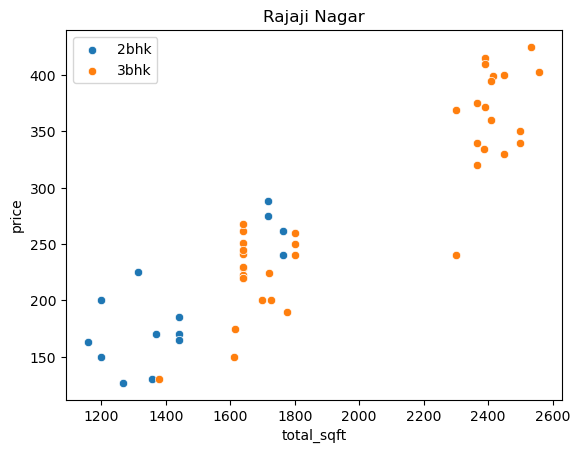

In [359]:
scatt_plot(df7,'Rajaji Nagar')

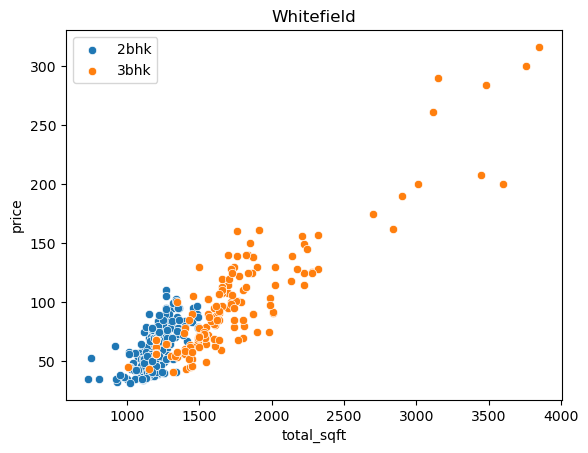

In [360]:
scatt_plot(df7,'Whitefield')

In [361]:
''' so lets remove the datapoint that have same or less price \
for equal space and bhks'''

' so lets remove the datapoint that have same or less price for equal space and bhks'

In [362]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
            'mean':np.mean(bhk_df.price_per_sqft),
            'std':np.std(bhk_df.price_per_sqft),
            'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [363]:
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 6)

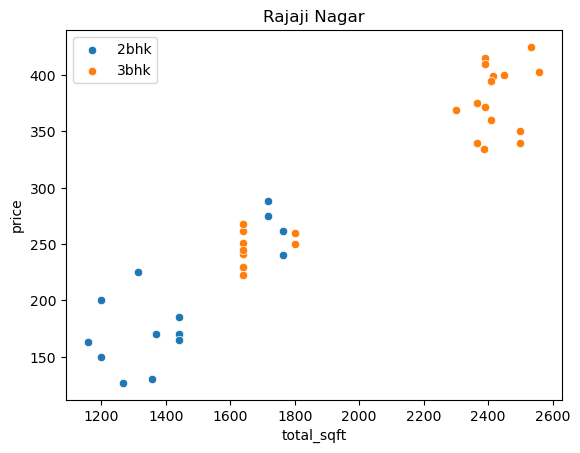

In [364]:
scatt_plot(df8,'Rajaji Nagar')
# majority of data points from dataset are removed

           #ploting histogram to see distributions of ppsqft etc...

C:\Users\Suleman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

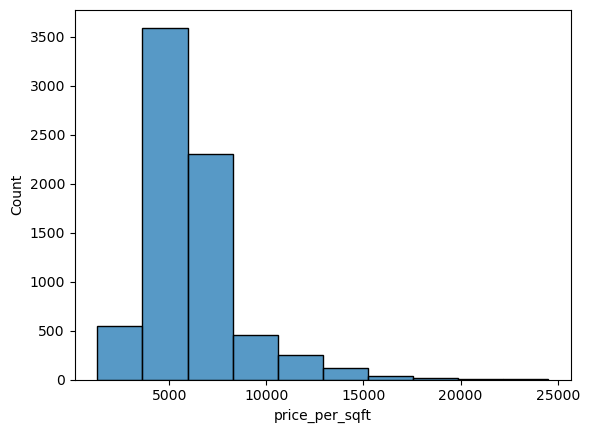

In [365]:
sns.histplot(data=df8,x='price_per_sqft',bins=10)


           #lets explore oulliers in bath column

In [366]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [367]:
(df8[df8.bath>10])

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


C:\Users\Suleman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bath', ylabel='Count'>

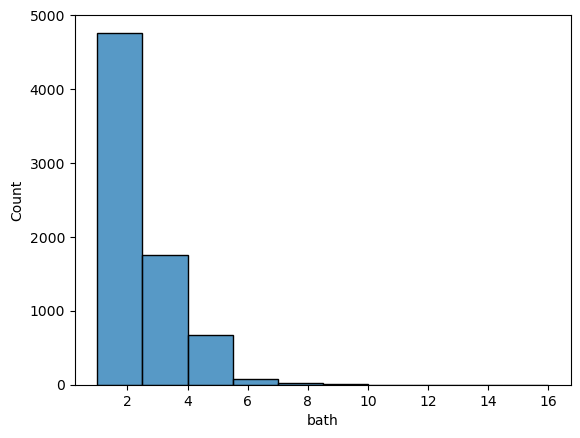

In [368]:
sns.histplot(data=df8.bath,bins=10)

In [369]:
# lets say for n-bhk if n+1-bathrms is OK    but having n+2 bathroom is unusual
df8[df8.bhk+2 < df8.bath]

# it will give entries with bkh+2 bathrooms

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [370]:
df9=df8[df8.bhk+2 > df8.bath]
# read as "after adding +2bhks still bhks must be greater or equal to bathrooms "
df9.shape

(7251, 6)

In [371]:
df9=df9.drop(['price_per_sqft'],axis='columns')
df9.shape

(7251, 5)

In [372]:
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [373]:
df10=df9

   # Machine learning

In [374]:
print("hi")

hi


In [375]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [376]:
# one hot encoding

In [377]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [378]:
dummies_int=dummies.astype(int)
dummies_int.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [379]:
#now join the encoded dummies column with df10

In [380]:
df11=pd.concat([df10,dummies_int.drop('other',axis=1)],axis='columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [381]:
df12=df11.drop('location',axis=1)
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [382]:
df12.shape

(7251, 245)

In [383]:
X = df12.drop('price',axis=1)
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [384]:
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [385]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [386]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()


In [387]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [388]:
lr_clf.score(X_test,y_test)

0.8452277697874279

# cross validation

In [389]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0 )

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [390]:
from  sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [391]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],  # Example parameter for LinearRegression
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage (assuming X and y are defined somewhere in your code):
# best_models_df = find_best_model_using_gridsearchcv(X, y)
# print(best_models_df)
find_best_model_using_gridsearchcv(X,y)


C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\base.

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687432,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.725600,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [392]:
# from above lr_clf has decent accuracy ,so choose it.

In [ ]:
list(X.columns)

In [398]:
def predict_price(location,sqft,bath,bhk):
    loc_index= np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [399]:
predict_price('Whitefield',2000,4,4)

C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


139.3860563827195

In [400]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677167738

In [410]:
predict_price('1st Phase JP Nagar',1000,3,3)

C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395194304

In [411]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\Suleman\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484007036

# pickle and json files

In [419]:
# pickle file to connect with flask server requirements
import pickle
with open ('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [420]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))